#Loading and visualizing data


In [24]:
import tensorflow as tf

from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow.keras.optimizers
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping


import numpy as np
import itertools
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive
import os
import cv2
import glob
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
path ='/content/drive/MyDrive/DATA/final_data' 

image_size = (224, 224)
batch_size = 10

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    label_mode = "categorical",
    validation_split=0.20,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    label_mode = "categorical",
    validation_split=0.20,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 2501 files belonging to 5 classes.
Using 2001 files for training.
Found 2501 files belonging to 5 classes.
Using 500 files for validation.


In [3]:
class_names = train_ds.class_names
print(class_names)

['0_selfie_indoor', '1_selfie_outdoor', '2_pose_indoor', '3_pose_outdoor', '4_without_human']


In [5]:
val_classes = val_ds.class_names

In [6]:
val_classes

['0_selfie_indoor',
 '1_selfie_outdoor',
 '2_pose_indoor',
 '3_pose_outdoor',
 '4_without_human']

In [3]:
#from tensorflow.keras.layers.experimental.preprocessing import Rescaling

rescale = Rescaling(scale=1.0/255)
rescaled_train_ds = train_ds.map(lambda image, label:(rescale(image), label))

rescale = Rescaling(scale=1.0/255)
rescaled_val_ds = val_ds.map(lambda image, label:(rescale(image), label))

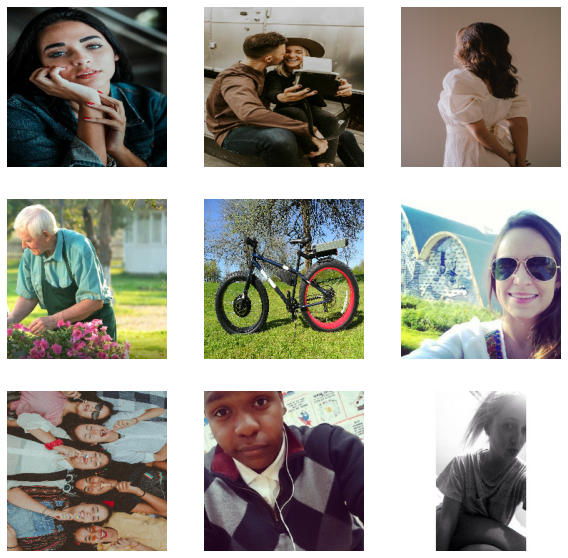

In [8]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    #plt.title(class_names[labels[i]])
    plt.axis("off")

#Mobile Net

In [4]:
from tensorflow.keras.applications.mobilenet import MobileNet

base_mn = MobileNet(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

base_mn.trainable = False

17227776/17225924 [==============================] - 0s 0us/step


In [5]:
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping

model_mn = models.Sequential()
#model_mn.add(layers.InputLayer(input_shape=(224,224,3)))
model_mn.add(base_mn)
model_mn.add(layers.Flatten())
model_mn.add(layers.Dense(256, activation='relu'))
model_mn.add(layers.Dense(5, activation='softmax'))

callback_1 = ModelCheckpoint('model_mn.pt',
							  monitor='val_acc',
							  save_best_only = True,
							  mode='max',
							  verbose=2)
callback_2 = EarlyStopping(patience = 15)
callback_list = [callback_1, callback_2]

model_mn.compile(loss='categorical_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [22]:
history = model_mn.fit_generator(
      rescaled_train_ds,
      steps_per_epoch=20,
      epochs=10,
      validation_data=rescaled_val_ds,
      validation_steps=10,
      verbose=2,
      callbacks=callback_list
      )

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
20/20 - 5s - loss: 5.6400 - acc: 0.4150 - val_loss: 0.9488 - val_acc: 0.5300

Epoch 00001: val_acc improved from -inf to 0.53000, saving model to model_mn.pt
INFO:tensorflow:Assets written to: model_mn.pt/assets
Epoch 2/10
20/20 - 2s - loss: 0.9247 - acc: 0.6700 - val_loss: 0.6660 - val_acc: 0.7400

Epoch 00002: val_acc improved from 0.53000 to 0.74000, saving model to model_mn.pt
INFO:tensorflow:Assets written to: model_mn.pt/assets
Epoch 3/10
20/20 - 2s - loss: 0.5719 - acc: 0.8050 - val_loss: 0.4674 - val_acc: 0.8400

Epoch 00003: val_acc improved from 0.74000 to 0.84000, saving model to model_mn.pt
INFO:tensorflow:Assets written to: model_mn.pt/assets
Epoch 4/10
20/20 - 2s - loss: 0.6814 - acc: 0.7600 - val_loss: 0.7182 - val_acc: 0.7300

Epoch 00004: val_acc did not improve from 0.84000
Epoch 5/10
20/20 - 2s - loss: 0.5644 - acc: 0.8200 - val_loss: 0.6362 - val_acc: 0.7500

Epoch 00005: val_acc did not improve from 0.84000
Epoch 6/10
20/20 - 2s - loss: 0.5338 - acc: 0.7

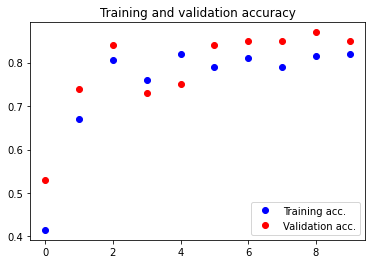

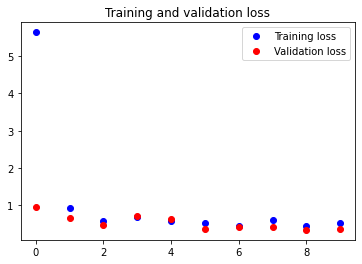

In [23]:
#ACCURACY HISTORY

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc.')
plt.plot(epochs, val_acc, 'ro', label='Validation acc.')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'ro', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#Inception V3


In [32]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_incV3 = InceptionV3(weights='imagenet', include_top=False,input_shape=(224,224,3))

87916544/87910968 [==============================] - 1s 0us/step


In [11]:
base_incV3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [38]:
base_incV3.trainable = False

from keras import models
from keras import layers

model_incV3 = models.Sequential()
#model_incV3.add(layers.InputLayer(input_shape=(224,224,3)))
model_incV3.add(base_incV3)
model_incV3.add(layers.Flatten())
model_incV3.add(layers.Dense(256, activation='relu'))
model_incV3.add(layers.Dense(5, activation='softmax'))

callback_1 = ModelCheckpoint('model_incV3',
							  monitor='val_acc',
							  save_best_only = True,
							  mode='max',
							  verbose=2)
callback_2 = EarlyStopping(patience = 15)
callback_list = [callback_1, callback_2]

model_incV3.compile(loss='categorical_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [26]:
history = model_incV3.fit(
      rescaled_train_ds,
      steps_per_epoch=20,
      epochs=10,
      validation_data=rescaled_val_ds,
      validation_steps=10,
      verbose=2,
      callbacks=callback_list
      )

Epoch 1/10
20/20 - 10s - loss: 4.9935 - acc: 0.2850 - val_loss: 1.3957 - val_acc: 0.4400

Epoch 00001: val_acc improved from -inf to 0.44000, saving model to model_incV3
INFO:tensorflow:Assets written to: model_incV3/assets
Epoch 2/10
20/20 - 2s - loss: 1.2208 - acc: 0.4950 - val_loss: 0.9587 - val_acc: 0.6400

Epoch 00002: val_acc improved from 0.44000 to 0.64000, saving model to model_incV3
INFO:tensorflow:Assets written to: model_incV3/assets
Epoch 3/10
20/20 - 2s - loss: 1.2037 - acc: 0.5600 - val_loss: 0.7921 - val_acc: 0.7500

Epoch 00003: val_acc improved from 0.64000 to 0.75000, saving model to model_incV3
INFO:tensorflow:Assets written to: model_incV3/assets
Epoch 4/10
20/20 - 2s - loss: 1.0038 - acc: 0.6100 - val_loss: 0.6837 - val_acc: 0.6900

Epoch 00004: val_acc did not improve from 0.75000
Epoch 5/10
20/20 - 2s - loss: 0.7940 - acc: 0.7150 - val_loss: 0.9983 - val_acc: 0.6200

Epoch 00005: val_acc did not improve from 0.75000
Epoch 6/10
20/20 - 2s - loss: 0.9169 - acc: 0.

#Data augmentation

In [45]:
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/drive/MyDrive/DATA/final_data'


In [46]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      validation_split=0.2,
      rotation_range=50,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
        base_dir,
        subset='training',
        target_size=(224, 224),
        seed=0,
        batch_size=10,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        base_dir,
        subset='validation',
        target_size=(224, 224),
        seed=0,
        batch_size=10,
        class_mode='categorical')

Found 2000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [7]:
X, y = validation_generator.next()
X


array([[[[0.5254902 , 0.44705886, 0.45098042],
         [0.5882353 , 0.5137255 , 0.4901961 ],
         [0.59607846, 0.5176471 , 0.47450984],
         ...,
         [0.7019608 , 0.6666667 , 0.6       ],
         [0.69411767, 0.65882355, 0.5921569 ],
         [0.7058824 , 0.65882355, 0.6039216 ]],

        [[0.47450984, 0.4156863 , 0.4039216 ],
         [0.53333336, 0.4784314 , 0.4431373 ],
         [0.57254905, 0.50980395, 0.45882356],
         ...,
         [0.7058824 , 0.67058825, 0.6117647 ],
         [0.7019608 , 0.6666667 , 0.60784316],
         [0.7137255 , 0.6666667 , 0.61960787]],

        [[0.43921572, 0.39607847, 0.37254903],
         [0.48235297, 0.4431373 , 0.4039216 ],
         [0.5254902 , 0.4784314 , 0.43137258],
         ...,
         [0.7058824 , 0.67058825, 0.6117647 ],
         [0.69411767, 0.6666667 , 0.6039216 ],
         [0.7176471 , 0.6666667 , 0.6313726 ]],

        ...,

        [[0.08627451, 0.08627451, 0.1254902 ],
         [0.08627451, 0.08627451, 0.1254902 ]

In [12]:
X[1].shape
X.shape

(10, 224, 224, 3)

In [ ]:
print(type(X.shape[0]))

In [9]:
y

array([[1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

#MobileNet and Inception V3 with augmented data

In [30]:
callback_1 = ModelCheckpoint('model_mn.pt',
							  monitor='val_acc',
							  save_best_only = True,
							  mode='max',
							  verbose=2)
callback_2 = EarlyStopping(patience = 15)
callback_list = [callback_1, callback_2]

history = model_mn.fit(
      train_generator,
      steps_per_epoch=20,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=10,
      verbose=2,
      callbacks=callback_list)

Epoch 1/50
20/20 - 8s - loss: 4.2680 - acc: 0.4350 - val_loss: 1.9139 - val_acc: 0.3600

Epoch 00001: val_acc improved from -inf to 0.36000, saving model to model_mn.pt
INFO:tensorflow:Assets written to: model_mn.pt/assets
Epoch 2/50
20/20 - 6s - loss: 0.9020 - acc: 0.6300 - val_loss: 1.1074 - val_acc: 0.5200

Epoch 00002: val_acc improved from 0.36000 to 0.52000, saving model to model_mn.pt
INFO:tensorflow:Assets written to: model_mn.pt/assets
Epoch 3/50
20/20 - 6s - loss: 0.9666 - acc: 0.5700 - val_loss: 0.9798 - val_acc: 0.6500

Epoch 00003: val_acc improved from 0.52000 to 0.65000, saving model to model_mn.pt
INFO:tensorflow:Assets written to: model_mn.pt/assets
Epoch 4/50
20/20 - 7s - loss: 0.9029 - acc: 0.5950 - val_loss: 1.1314 - val_acc: 0.4200

Epoch 00004: val_acc did not improve from 0.65000
Epoch 5/50
20/20 - 6s - loss: 0.8334 - acc: 0.6400 - val_loss: 0.7716 - val_acc: 0.6900

Epoch 00005: val_acc improved from 0.65000 to 0.69000, saving model to model_mn.pt
INFO:tensorflo

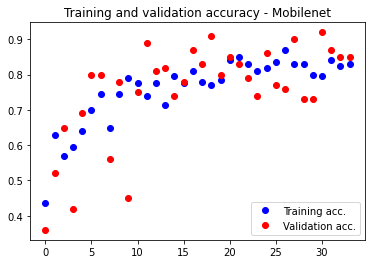

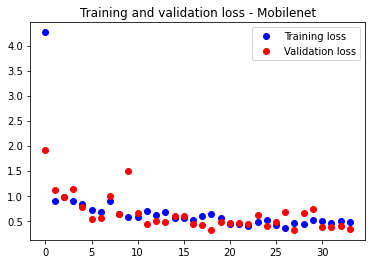

In [31]:
#ACCURACY HISTORY

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc.')
plt.plot(epochs, val_acc, 'ro', label='Validation acc.')
plt.title('Training and validation accuracy - Mobilenet')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'ro', label='Validation loss')
plt.title('Training and validation loss - Mobilenet')
plt.legend()

plt.show()

In [36]:
#saving the model to drive

from tensorflow.keras.applications.mobilenet import MobileNet

base_mn = MobileNet(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

base_mn.summary()
base_mn.trainable = False

model_mn = models.Sequential()
#model_mn.add(layers.InputLayer(input_shape=(224,224,3)))
model_mn.add(base_mn)
model_mn.add(layers.Flatten())
model_mn.add(layers.Dense(256, activation='relu'))
model_mn.add(layers.Dense(5, activation='softmax'))

model_mn.compile(loss='categorical_crossentropy',
              optimizer="sgd",
              metrics=['acc', 'AUC'])


callback_1 = ModelCheckpoint('/content/drive/MyDrive/DATA/final_model/model_mn3.pt',
							  monitor='val_acc',
							  save_best_only = True,
							  mode='max',
							  verbose=2)
callback_2 = EarlyStopping(patience = 15)
callback_list = [callback_1, callback_2]

history = model_mn.fit(
      train_generator,
      steps_per_epoch=20,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=10,
      verbose=2,
      callbacks=callback_list)

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [37]:
from keras.models import load_model
model_mn3 = load_model('/content/drive/MyDrive/DATA/final_model/model_mn3.pt')

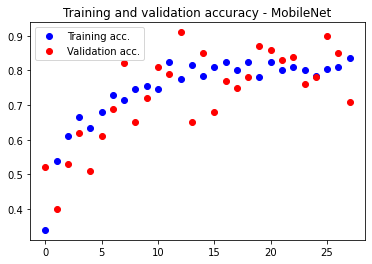

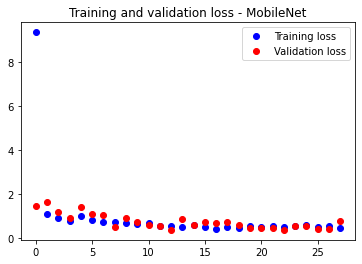

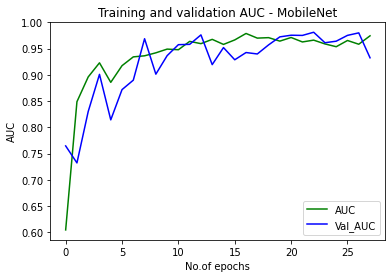

<Figure size 432x288 with 0 Axes>

In [38]:
#ACCURACY HISTORY

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
AUC = history.history['auc']
val_AUC = history.history['val_auc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc.')
plt.plot(epochs, val_acc, 'ro', label='Validation acc.')
plt.title('Training and validation accuracy - MobileNet')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'ro', label='Validation loss')
plt.title('Training and validation loss - MobileNet')
plt.legend()
plt.figure()

plt.plot(epochs, AUC, 'g', label='AUC')
plt.plot(epochs, val_AUC, 'b', label='Val_AUC')
plt.xlabel('No.of epochs')
plt.ylabel('AUC')
plt.title('Training and validation AUC - MobileNet')
plt.legend()
plt.figure()

plt.show()

### Training MobileNet with 100 epochs - model_mn4


In [8]:
from tensorflow.keras.applications.mobilenet import MobileNet
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping

base_mn = MobileNet(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

base_mn.summary()
base_mn.trainable = False

model_mn = models.Sequential()
#model_mn.add(layers.InputLayer(input_shape=(224,224,3)))
model_mn.add(base_mn)
model_mn.add(layers.Flatten())
model_mn.add(layers.Dense(256, activation='relu'))
model_mn.add(layers.Dense(5, activation='softmax'))

model_mn.compile(loss='categorical_crossentropy',
              optimizer="sgd",
              metrics=['acc', 'AUC'])


callback_1 = ModelCheckpoint('/content/drive/MyDrive/DATA/final_model/model_mn4.pt',
							  monitor='val_acc',
							  save_best_only = True,
							  mode='max',
							  verbose=2)
callback_2 = EarlyStopping(patience = 15)
callback_list = [callback_1, callback_2]

history = model_mn.fit(
      train_generator,
      steps_per_epoch=20,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=10,
      verbose=2,
      callbacks=callback_list)

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

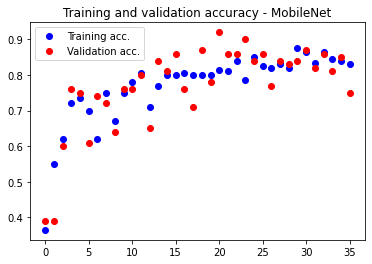

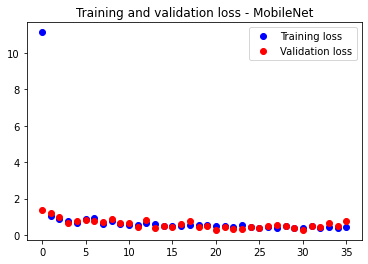

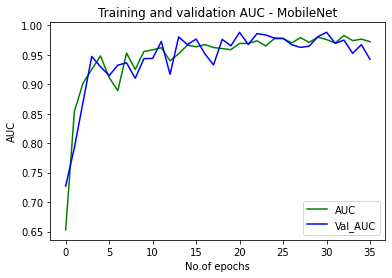

<Figure size 432x288 with 0 Axes>

In [9]:
#ACCURACY HISTORY

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
AUC = history.history['auc']
val_AUC = history.history['val_auc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc.')
plt.plot(epochs, val_acc, 'ro', label='Validation acc.')
plt.title('Training and validation accuracy - MobileNet')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'ro', label='Validation loss')
plt.title('Training and validation loss - MobileNet')
plt.legend()
plt.figure()

plt.plot(epochs, AUC, 'g', label='AUC')
plt.plot(epochs, val_AUC, 'b', label='Val_AUC')
plt.xlabel('No.of epochs')
plt.ylabel('AUC')
plt.title('Training and validation AUC - MobileNet')
plt.legend()
plt.figure()

plt.show()

#### Getting labels and predictions for validation dataset, metrics

In [6]:
from keras.models import load_model
model_mn4 = load_model('/content/drive/MyDrive/DATA/final_model/model_mn4.pt')

In [8]:
probabilities = model_mn4.predict(validation_generator, 499)

In [9]:
probabilities.shape

(499, 5)

In [11]:
probabilities[1]

array([1.2482075e-03, 2.4608791e-05, 9.8781526e-01, 1.0910463e-02,
       1.3988456e-06], dtype=float32)

In [12]:
predictions = []
for i in range(probabilities.shape[0]):
  predictions.append(np.argmax(probabilities[i]))

In [13]:
len(predictions)

499

In [14]:
total_images = 0;
labels = []
while total_images < 499:
    X, y = validation_generator.next()
    total_images += X.shape[0]
    for i in range(y.shape[0]):
      labels.append(np.argmax(y))

In [15]:
len(labels)

499

In [30]:
import pandas as pd

cm = tf.math.confusion_matrix(labels=labels, predictions=predictions).numpy()
cm = pd.DataFrame(cm)
cm

,0,1,2,3,4
0,9,12,16,9,14
1,18,30,15,18,18
2,23,27,36,28,26
3,13,17,18,23,19
4,12,32,25,24,17


In [22]:
model_mn4.evaluate_generator(validation_generator)    # output is loss, val_accuracy, auc?

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.3592936396598816, 0.8717435002326965, 0.9823846220970154]

In [23]:
model_mn4.evaluate(validation_generator)

50/50 [==============================] - 5s 107ms/step - loss: 0.3593 - acc: 0.8717 - auc: 0.9824


[0.359293669462204, 0.8717435002326965, 0.9823846220970154]

In [28]:
(val_loss, val_accuracy, val_auc) = model_mn4.evaluate(validation_generator)

50/50 [==============================] - 5s 108ms/step - loss: 0.3593 - acc: 0.8717 - auc: 0.9824


In [29]:
print('[INFO] Loss: {}'.format(val_loss)) 
print('[INFO] Accuracy: {:.2f}%'.format(val_accuracy * 100)) 
print('[INFO] AUC: {}'.format(val_auc)) 

[INFO] Loss: 0.359293669462204
[INFO] Accuracy: 87.17%
[INFO] AUC: 0.9823846220970154


In [52]:
# we have to set shuffle=False in validation_generator

validation_generator = test_datagen.flow_from_directory(
        base_dir,
        subset='validation',
        target_size=(224, 224),
        seed=0,
        batch_size=1,
        shuffle=False,
        class_mode='categorical')

Found 500 images belonging to 5 classes.


In [53]:
# import classification_report
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# get the ground truth of your data. 
test_labels=validation_generator.classes 

# predict the probability distribution of the data
probabilities = model_mn4.predict(validation_generator, steps=500, verbose=1)

# get the class with highest probability for each sample
y_pred = np.argmax(probabilities, axis=-1)

# get the classification report
print(classification_report(test_labels, y_pred))

# get the confussion matrix
print(confusion_matrix(test_labels, y_pred))

500/500 [==============================] - 28s 56ms/step
              precision    recall  f1-score   support

           0       0.92      0.69      0.79       100
           1       0.80      0.94      0.86       100
           2       0.82      0.90      0.86       100
           3       0.86      0.89      0.88       100
           4       0.99      0.93      0.96       100

    accuracy                           0.87       500
   macro avg       0.88      0.87      0.87       500
weighted avg       0.88      0.87      0.87       500

[[69 17 13  1  0]
 [ 3 94  1  2  0]
 [ 3  0 90  6  1]
 [ 0  6  5 89  0]
 [ 0  1  1  5 93]]


In [56]:
len(test_labels)

500

In [57]:
len(probabilities)

500

In [59]:
len(y_pred)

500

#Xception

In [12]:
from tensorflow.keras.applications.xception import Xception
base_xcept = Xception(weights='imagenet', include_top=False,input_shape=(224,224,3))

83689472/83683744 [==============================] - 1s 0us/step


In [26]:
base_xcept.trainable = False

from keras import models
from keras import layers

model_xcept = models.Sequential()
#model_xcept.add(layers.InputLayer(input_shape=(224,224,3)))
model_xcept.add(base_xcept)
model_xcept.add(layers.Flatten())
model_xcept.add(layers.Dense(256, activation='relu'))
model_xcept.add(layers.Dense(5, activation='softmax'))

callback_1 = ModelCheckpoint('model_xcept.pt',
							  monitor='val_acc',
							  save_best_only = True,
							  mode='max',
							  verbose=2)
callback_2 = EarlyStopping(patience = 15)
callback_list = [callback_1, callback_2]

model_xcept.compile(loss='categorical_crossentropy',
              optimizer="sgd",
              metrics=['acc', 'AUC'])



history = model_xcept.fit(
      train_generator,
      steps_per_epoch=20,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=10,
      verbose=2,
      callbacks=callback_list)



Epoch 1/50
20/20 - 12s - loss: 2.1552 - acc: 0.4750 - auc: 0.6920 - val_loss: 0.9723 - val_acc: 0.5800 - val_auc: 0.8910

Epoch 00001: val_acc improved from -inf to 0.58000, saving model to model_xcept.pt


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: model_xcept.pt/assets
Epoch 2/50
20/20 - 7s - loss: 0.9081 - acc: 0.6450 - auc: 0.8949 - val_loss: 0.8739 - val_acc: 0.6400 - val_auc: 0.9036

Epoch 00002: val_acc improved from 0.58000 to 0.64000, saving model to model_xcept.pt


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: model_xcept.pt/assets
Epoch 3/50
20/20 - 6s - loss: 0.9077 - acc: 0.6400 - auc: 0.8962 - val_loss: 0.7860 - val_acc: 0.6900 - val_auc: 0.9300

Epoch 00003: val_acc improved from 0.64000 to 0.69000, saving model to model_xcept.pt


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: model_xcept.pt/assets
Epoch 4/50
20/20 - 6s - loss: 0.6731 - acc: 0.7250 - auc: 0.9431 - val_loss: 0.9116 - val_acc: 0.6000 - val_auc: 0.8998

Epoch 00004: val_acc did not improve from 0.69000
Epoch 5/50
20/20 - 6s - loss: 0.7624 - acc: 0.7250 - auc: 0.9266 - val_loss: 0.6774 - val_acc: 0.7300 - val_auc: 0.9428

Epoch 00005: val_acc improved from 0.69000 to 0.73000, saving model to model_xcept.pt


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: model_xcept.pt/assets
Epoch 6/50
20/20 - 6s - loss: 0.5288 - acc: 0.7850 - auc: 0.9639 - val_loss: 1.0800 - val_acc: 0.6400 - val_auc: 0.8770

Epoch 00006: val_acc did not improve from 0.73000
Epoch 7/50
20/20 - 6s - loss: 0.6343 - acc: 0.7450 - auc: 0.9491 - val_loss: 0.6187 - val_acc: 0.7500 - val_auc: 0.9507

Epoch 00007: val_acc improved from 0.73000 to 0.75000, saving model to model_xcept.pt


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: model_xcept.pt/assets
Epoch 8/50
20/20 - 7s - loss: 0.6314 - acc: 0.7500 - auc: 0.9489 - val_loss: 0.7771 - val_acc: 0.7000 - val_auc: 0.9229

Epoch 00008: val_acc did not improve from 0.75000
Epoch 9/50
20/20 - 6s - loss: 0.7539 - acc: 0.6950 - auc: 0.9279 - val_loss: 0.5046 - val_acc: 0.8500 - val_auc: 0.9699

Epoch 00009: val_acc improved from 0.75000 to 0.85000, saving model to model_xcept.pt


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: model_xcept.pt/assets
Epoch 10/50
20/20 - 7s - loss: 0.6429 - acc: 0.7550 - auc: 0.9490 - val_loss: 0.6355 - val_acc: 0.7800 - val_auc: 0.9481

Epoch 00010: val_acc did not improve from 0.85000
Epoch 11/50
20/20 - 7s - loss: 0.5947 - acc: 0.7950 - auc: 0.9553 - val_loss: 0.5405 - val_acc: 0.8500 - val_auc: 0.9636

Epoch 00011: val_acc did not improve from 0.85000
Epoch 12/50
20/20 - 6s - loss: 0.5677 - acc: 0.7800 - auc: 0.9585 - val_loss: 0.5815 - val_acc: 0.7900 - val_auc: 0.9554

Epoch 00012: val_acc did not improve from 0.85000
Epoch 13/50
20/20 - 6s - loss: 0.6196 - acc: 0.7450 - auc: 0.9505 - val_loss: 0.4625 - val_acc: 0.8300 - val_auc: 0.9730

Epoch 00013: val_acc did not improve from 0.85000
Epoch 14/50
20/20 - 7s - loss: 0.5782 - acc: 0.8000 - auc: 0.9577 - val_loss: 0.7118 - val_acc: 0.7300 - val_auc: 0.9357

Epoch 00014: val_acc did not improve from 0.85000
Epoch 15/50
20/20 - 7s - loss: 0.5637 - acc: 0.8100 - auc: 0.9584 - val_loss: 0.440

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: model_xcept.pt/assets
Epoch 20/50
20/20 - 7s - loss: 0.6067 - acc: 0.7800 - auc: 0.9539 - val_loss: 0.7177 - val_acc: 0.7400 - val_auc: 0.9350

Epoch 00020: val_acc did not improve from 0.86000
Epoch 21/50
20/20 - 6s - loss: 0.4720 - acc: 0.8350 - auc: 0.9694 - val_loss: 0.5350 - val_acc: 0.8000 - val_auc: 0.9636

Epoch 00021: val_acc did not improve from 0.86000
Epoch 22/50
20/20 - 6s - loss: 0.5446 - acc: 0.7850 - auc: 0.9630 - val_loss: 0.3396 - val_acc: 0.8500 - val_auc: 0.9854

Epoch 00022: val_acc did not improve from 0.86000
Epoch 23/50
20/20 - 6s - loss: 0.5294 - acc: 0.8050 - auc: 0.9626 - val_loss: 0.4915 - val_acc: 0.8000 - val_auc: 0.9691

Epoch 00023: val_acc did not improve from 0.86000
Epoch 24/50
20/20 - 7s - loss: 0.5101 - acc: 0.7800 - auc: 0.9651 - val_loss: 0.5340 - val_acc: 0.7700 - val_auc: 0.9622

Epoch 00024: val_acc did not improve from 0.86000
Epoch 25/50
20/20 - 7s - loss: 0.5293 - acc: 0.7600 - auc: 0.9636 - val_loss: 0.364

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: model_xcept.pt/assets
Epoch 26/50
20/20 - 6s - loss: 0.4473 - acc: 0.8200 - auc: 0.9744 - val_loss: 0.5370 - val_acc: 0.8400 - val_auc: 0.9610

Epoch 00026: val_acc did not improve from 0.87000
Epoch 27/50
20/20 - 6s - loss: 0.4487 - acc: 0.8300 - auc: 0.9728 - val_loss: 0.5043 - val_acc: 0.7800 - val_auc: 0.9659

Epoch 00027: val_acc did not improve from 0.87000
Epoch 28/50
20/20 - 7s - loss: 0.3876 - acc: 0.8450 - auc: 0.9800 - val_loss: 0.3921 - val_acc: 0.8500 - val_auc: 0.9798

Epoch 00028: val_acc did not improve from 0.87000
Epoch 29/50
20/20 - 6s - loss: 0.3703 - acc: 0.8800 - auc: 0.9798 - val_loss: 0.4204 - val_acc: 0.8500 - val_auc: 0.9774

Epoch 00029: val_acc did not improve from 0.87000
Epoch 30/50
20/20 - 6s - loss: 0.5435 - acc: 0.8150 - auc: 0.9619 - val_loss: 0.3622 - val_acc: 0.8700 - val_auc: 0.9841

Epoch 00030: val_acc did not improve from 0.87000
Epoch 31/50
20/20 - 7s - loss: 0.4690 - acc: 0.8450 - auc: 0.9686 - val_loss: 0.540

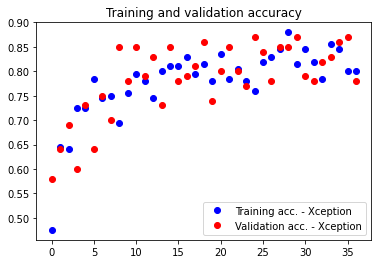

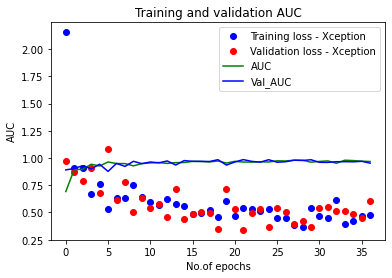

<Figure size 432x288 with 0 Axes>

In [27]:
#ACCURACY HISTORY

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
AUC = history.history['auc']
val_AUC = history.history['val_auc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc.')
plt.plot(epochs, val_acc, 'ro', label='Validation acc.')
plt.title('Training and validation accuracy - Xception')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'ro', label='Validation loss')
plt.title('Training and validation loss - Xception')
plt.legend()
plt.figure()

plt.plot(epochs, AUC, 'g', label='AUC')
plt.plot(epochs, val_AUC, 'b', label='Val_AUC')
plt.xlabel('No.of epochs')
plt.ylabel('AUC')
plt.title('Training and validation AUC - Xception')
plt.legend()
plt.figure()

plt.show()

#ResNet101

In [15]:
from tensorflow.keras.applications.resnet import ResNet101
base_rnet101 = ResNet101(weights='imagenet', include_top=False,input_shape=(224,224,3))

171450368/171446536 [==============================] - 2s 0us/step


In [16]:
base_rnet101.trainable = False

from keras import models
from keras import layers

model_rnet101 = models.Sequential()
#model_rnet101.add(layers.InputLayer(input_shape=(224,224,3)))
model_rnet101.add(base_rnet101)
model_rnet101.add(layers.Flatten())
model_rnet101.add(layers.Dense(256, activation='relu'))
model_rnet101.add(layers.Dense(5, activation='softmax'))

callback_1 = ModelCheckpoint('model_rnet101.pt',
							  monitor='val_acc',
							  save_best_only = True,
							  mode='max',
							  verbose=2)
callback_2 = EarlyStopping(patience = 15)
callback_list = [callback_1, callback_2]

model_rnet101.compile(loss='categorical_crossentropy',
              optimizer="sgd",
              metrics=['acc', 'auc'])



history = model_rnet101.fit(
      train_generator,
      steps_per_epoch=20,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=10,
      verbose=2,
      callbacks=callback_list)

Epoch 1/50
20/20 - 17s - loss: 11.5004 - acc: 0.1650 - val_loss: 1.6102 - val_acc: 0.1400

Epoch 00001: val_acc improved from -inf to 0.14000, saving model to model_rnet101.pt


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: model_rnet101.pt/assets
Epoch 2/50
20/20 - 6s - loss: 1.6872 - acc: 0.1800 - val_loss: 1.6111 - val_acc: 0.1400

Epoch 00002: val_acc did not improve from 0.14000
Epoch 3/50
20/20 - 7s - loss: 1.6189 - acc: 0.1850 - val_loss: 1.6093 - val_acc: 0.2300

Epoch 00003: val_acc improved from 0.14000 to 0.23000, saving model to model_rnet101.pt


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: model_rnet101.pt/assets
Epoch 4/50
20/20 - 7s - loss: 1.6772 - acc: 0.2450 - val_loss: 1.6095 - val_acc: 0.2100

Epoch 00004: val_acc did not improve from 0.23000
Epoch 5/50
20/20 - 6s - loss: 1.6119 - acc: 0.2250 - val_loss: 1.6087 - val_acc: 0.2300

Epoch 00005: val_acc did not improve from 0.23000
Epoch 6/50
20/20 - 7s - loss: 1.6104 - acc: 0.1900 - val_loss: 1.6108 - val_acc: 0.1700

Epoch 00006: val_acc did not improve from 0.23000
Epoch 7/50
20/20 - 7s - loss: 1.6093 - acc: 0.1800 - val_loss: 1.6080 - val_acc: 0.2000

Epoch 00007: val_acc did not improve from 0.23000
Epoch 8/50
20/20 - 6s - loss: 1.6129 - acc: 0.2600 - val_loss: 1.6087 - val_acc: 0.2000

Epoch 00008: val_acc did not improve from 0.23000
Epoch 9/50
20/20 - 6s - loss: 1.6106 - acc: 0.2050 - val_loss: 1.6096 - val_acc: 0.2100

Epoch 00009: val_acc did not improve from 0.23000
Epoch 10/50
20/20 - 6s - loss: 1.6078 - acc: 0.2500 - val_loss: 1.6083 - val_acc: 0.2200

Epoch 00010: val_

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: model_rnet101.pt/assets


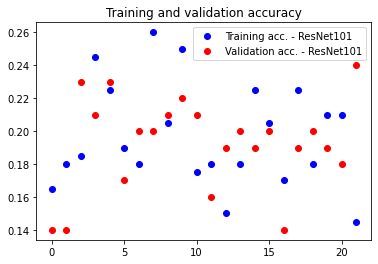

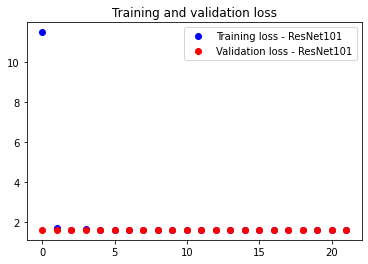

In [17]:

#ACCURACY HISTORY

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc.')
plt.plot(epochs, val_acc, 'ro', label='Validation acc.')
plt.title('Training and validation accuracy - ResNet101')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'ro', label='Validation loss')
plt.title('Training and validation loss - ResNet101')
plt.legend()
plt.figure()


plt.plot(epochs, AUC, 'g', label='AUC')
plt.plot(epochs, val_AUC, 'b', label='Val_AUC')
plt.xlabel('No.of epochs')
plt.ylabel('AUC')
plt.title('Training and validation AUC - ResNet101')
plt.legend()
plt.figure()

plt.show()

#VGG16

In [19]:
from tensorflow.keras.applications.vgg16 import VGG16 

In [20]:
base_vgg16 = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))


58892288/58889256 [==============================] - 1s 0us/step


In [21]:
base_vgg16.trainable = False

from keras import models
from keras import layers

model_vgg16 = models.Sequential()
#model_vgg16.add(layers.InputLayer(input_shape=(224,224,3)))
model_vgg16.add(base_vgg16)
model_vgg16.add(layers.Flatten())
model_vgg16.add(layers.Dense(256, activation='relu'))
model_vgg16.add(layers.Dense(5, activation='softmax'))

callback_1 = ModelCheckpoint('model_vgg16.pt',
							  monitor='val_acc',
							  save_best_only = True,
							  mode='max',
							  verbose=2)
callback_2 = EarlyStopping(patience = 15)
callback_list = [callback_1, callback_2]

model_vgg16.compile(loss='categorical_crossentropy',
              optimizer="sgd",
              metrics=['acc', 'auc'])



history = model_vgg16.fit(
      train_generator,
      steps_per_epoch=20,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=10,
      verbose=2,
      callbacks=callback_list)

Epoch 1/50
20/20 - 9s - loss: 2.3927 - acc: 0.2700 - val_loss: 1.5899 - val_acc: 0.1700

Epoch 00001: val_acc improved from -inf to 0.17000, saving model to model_vgg16.pt
INFO:tensorflow:Assets written to: model_vgg16.pt/assets
Epoch 2/50
20/20 - 7s - loss: 1.5582 - acc: 0.2850 - val_loss: 1.5609 - val_acc: 0.2000

Epoch 00002: val_acc improved from 0.17000 to 0.20000, saving model to model_vgg16.pt
INFO:tensorflow:Assets written to: model_vgg16.pt/assets
Epoch 3/50
20/20 - 7s - loss: 1.5650 - acc: 0.3150 - val_loss: 1.5228 - val_acc: 0.2700

Epoch 00003: val_acc improved from 0.20000 to 0.27000, saving model to model_vgg16.pt
INFO:tensorflow:Assets written to: model_vgg16.pt/assets
Epoch 4/50
20/20 - 6s - loss: 1.5082 - acc: 0.3400 - val_loss: 1.5177 - val_acc: 0.2600

Epoch 00004: val_acc did not improve from 0.27000
Epoch 5/50
20/20 - 7s - loss: 1.4714 - acc: 0.3300 - val_loss: 1.4776 - val_acc: 0.3100

Epoch 00005: val_acc improved from 0.27000 to 0.31000, saving model to model_vg

In [ ]:
#ACCURACY HISTORY

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc.')
plt.plot(epochs, val_acc, 'ro', label='Validation acc.')
plt.title('Training and validation accuracy - VGG16')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'ro', label='Validation loss')
plt.title('Training and validation loss - VGG16')
plt.legend()
plt.figure()


plt.plot(epochs, AUC, 'g', label='AUC')
plt.plot(epochs, val_AUC, 'b', label='Val_AUC')
plt.xlabel('No.of epochs')
plt.ylabel('AUC')
plt.title('Training and validation AUC - VGG16')
plt.legend()
plt.figure()

plt.show()